In [1]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


In [2]:
# Load the Excel file
excel_file = '../feature_ranking_plot/feature_ranking_consol.xlsx'
rankings_df = pd.read_excel(excel_file)

In [3]:
# Load the dataset from CSV file
train_dataset_file = '../../data/BinaryClassify/train_nsl_kdd_binary_encoded.csv'
dataset = pd.read_csv(train_dataset_file)
dataset = dataset.drop('level',axis=1)

dataset.columns = [f'f{i+1}' for i in range(len(dataset.columns))]

In [4]:
X  =dataset.drop('f42',axis=1)
y = dataset['f42']

In [5]:
def calculate_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return accuracy_score(y_test, predictions)


In [6]:
# Split your data into train and test sets before the iterations
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [7]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}


Random Forest:
-------------
Number of Filters: 1, Accuracy: 0.9987, Precision: 0.9982, Recall: 0.9993
Number of Filters: 2, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9993
Number of Filters: 3, Accuracy: 0.9986, Precision: 0.9980, Recall: 0.9994
Number of Filters: 4, Accuracy: 0.9986, Precision: 0.9980, Recall: 0.9993
Number of Filters: 5, Accuracy: 0.9985, Precision: 0.9981, Recall: 0.9992
Number of Filters: 6, Accuracy: 0.9985, Precision: 0.9981, Recall: 0.9990
Number of Filters: 7, Accuracy: 0.9981, Precision: 0.9979, Recall: 0.9986
Number of Filters: 8, Accuracy: 0.9229, Precision: 0.9066, Recall: 0.9531
Number of Filters: 9, Accuracy: 0.8477, Precision: 0.8773, Recall: 0.8292
Number of Filters: 10, No features selected

Decision Tree:
-------------
Number of Filters: 1, Accuracy: 0.9976, Precision: 0.9975, Recall: 0.9980
Number of Filters: 2, Accuracy: 0.9978, Precision: 0.9979, Recall: 0.9979
Number of Filters: 3, Accuracy: 0.9978, Precision: 0.9981, Recall: 0.9978
Number o

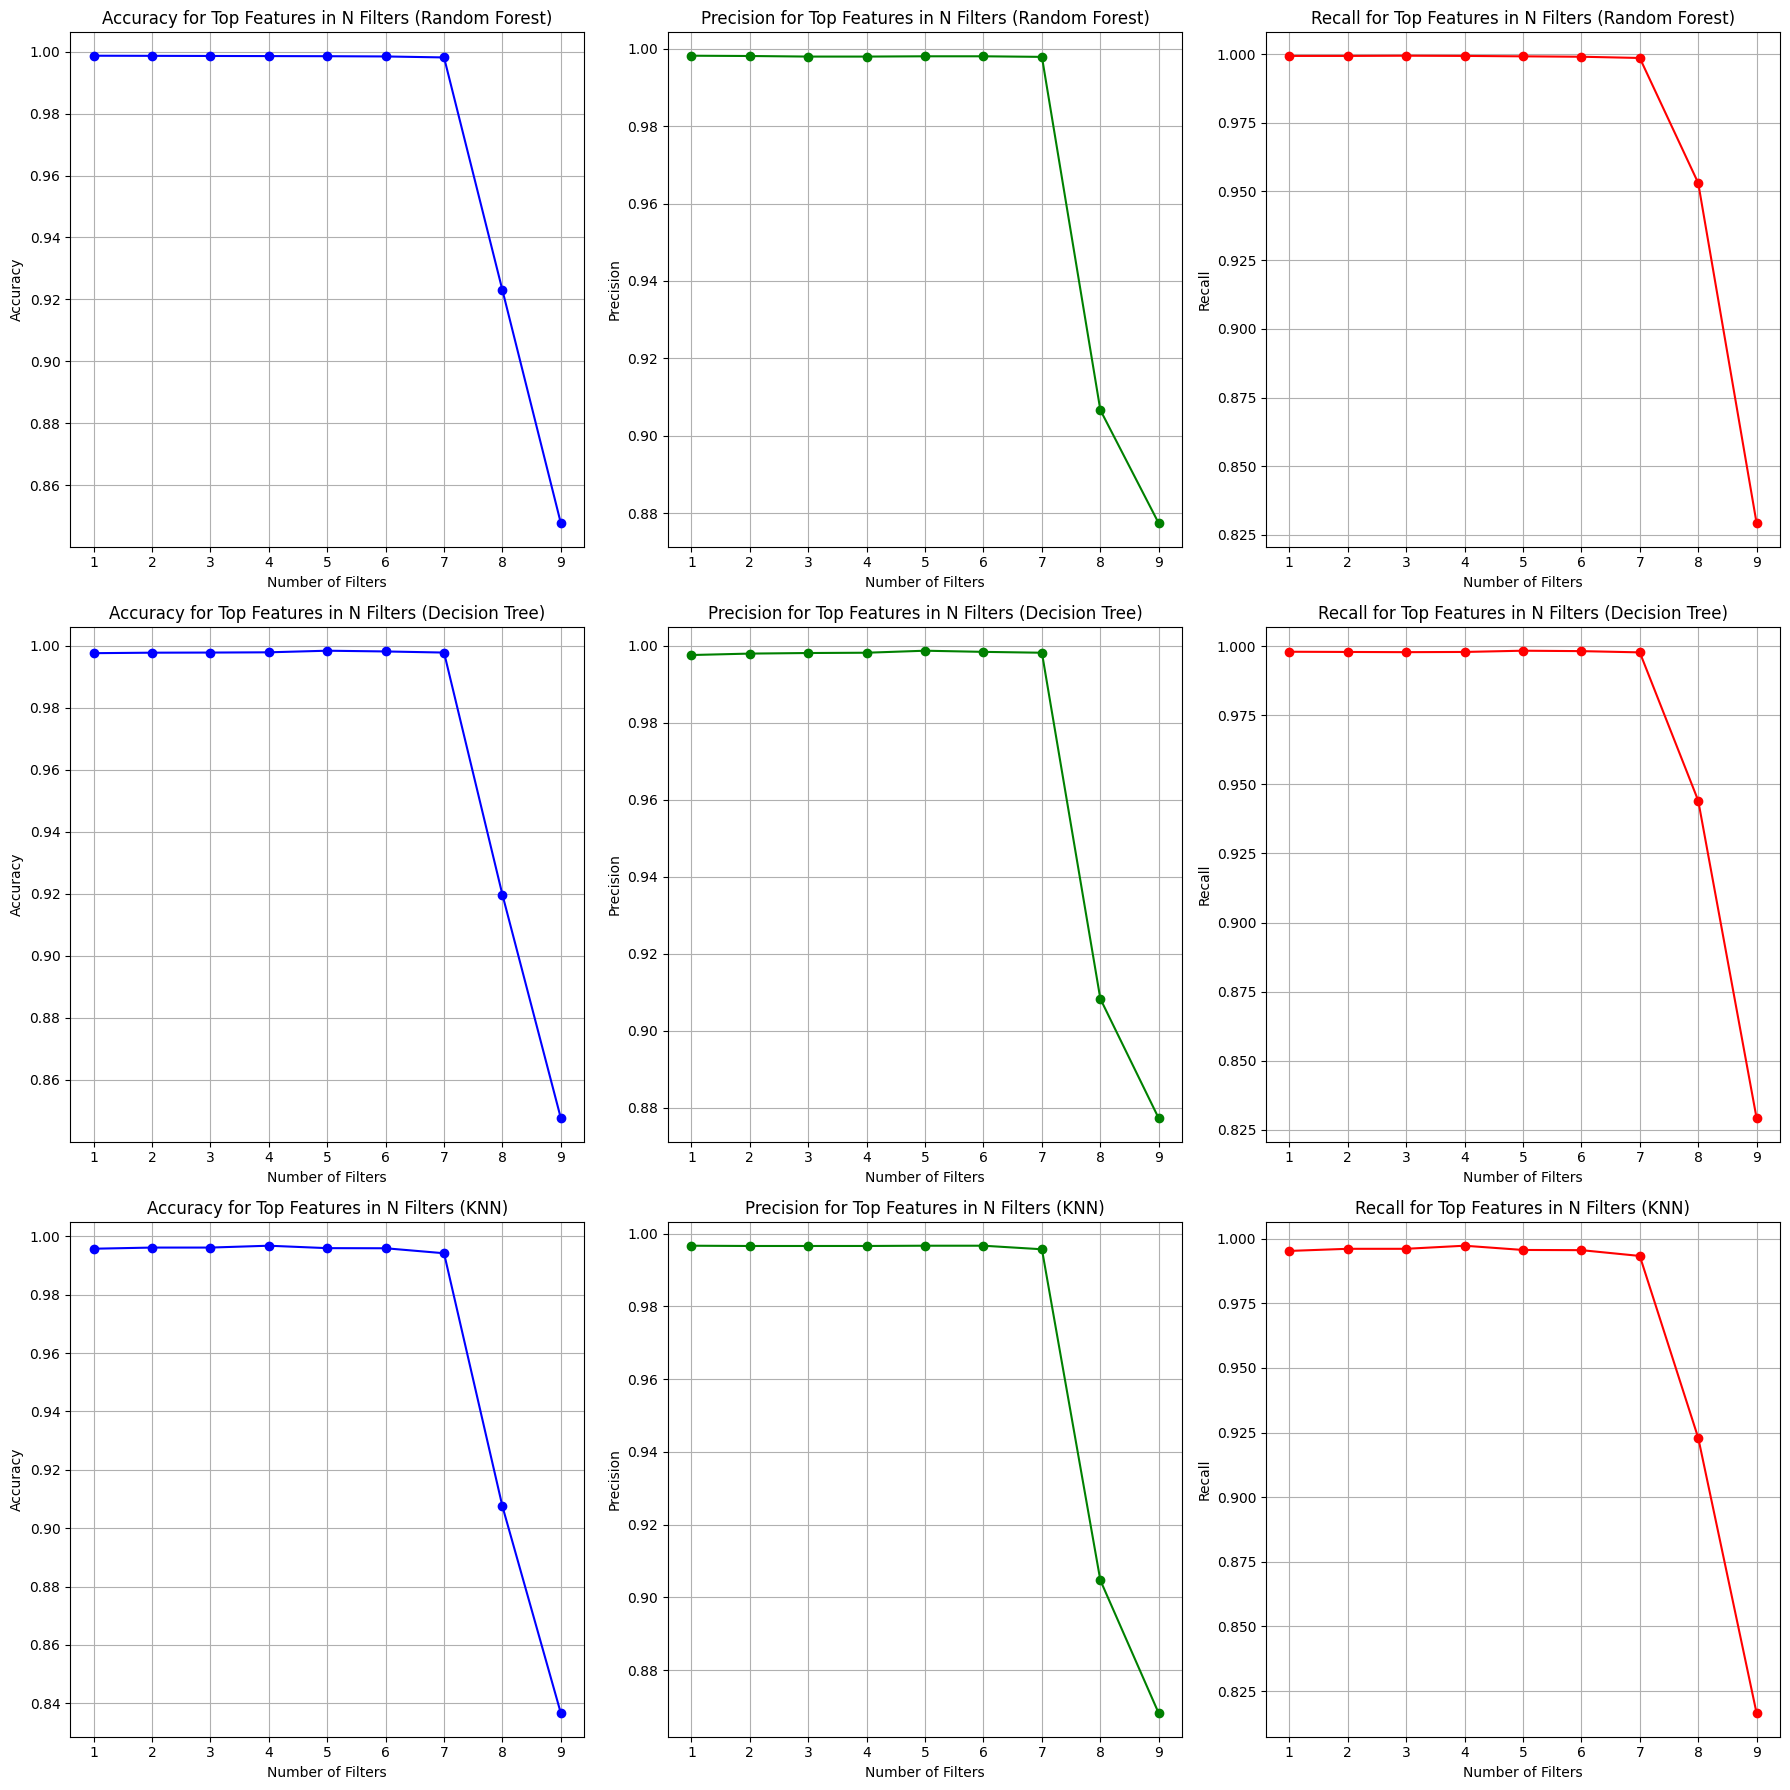


Random Forest:
-------------
Number of Filters: 1, Accuracy: 0.9989, Precision: 0.9983, Recall: 0.9997
Number of Filters: 2, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994
Number of Filters: 3, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994
Number of Filters: 4, Accuracy: 0.9986, Precision: 0.9980, Recall: 0.9994
Number of Filters: 5, Accuracy: 0.9986, Precision: 0.9980, Recall: 0.9994
Number of Filters: 6, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994
Number of Filters: 7, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9995
Number of Filters: 8, Accuracy: 0.9868, Precision: 0.9843, Recall: 0.9910
Number of Filters: 9, Accuracy: 0.9779, Precision: 0.9779, Recall: 0.9806
Number of Filters: 10, Accuracy: 0.9299, Precision: 0.9217, Recall: 0.9488
Number of Filters: 11, No features selected
Number of Filters: 12, No features selected
Number of Filters: 13, No features selected
Number of Filters: 14, No features selected
Number of Filters: 15, No features selected

Decision

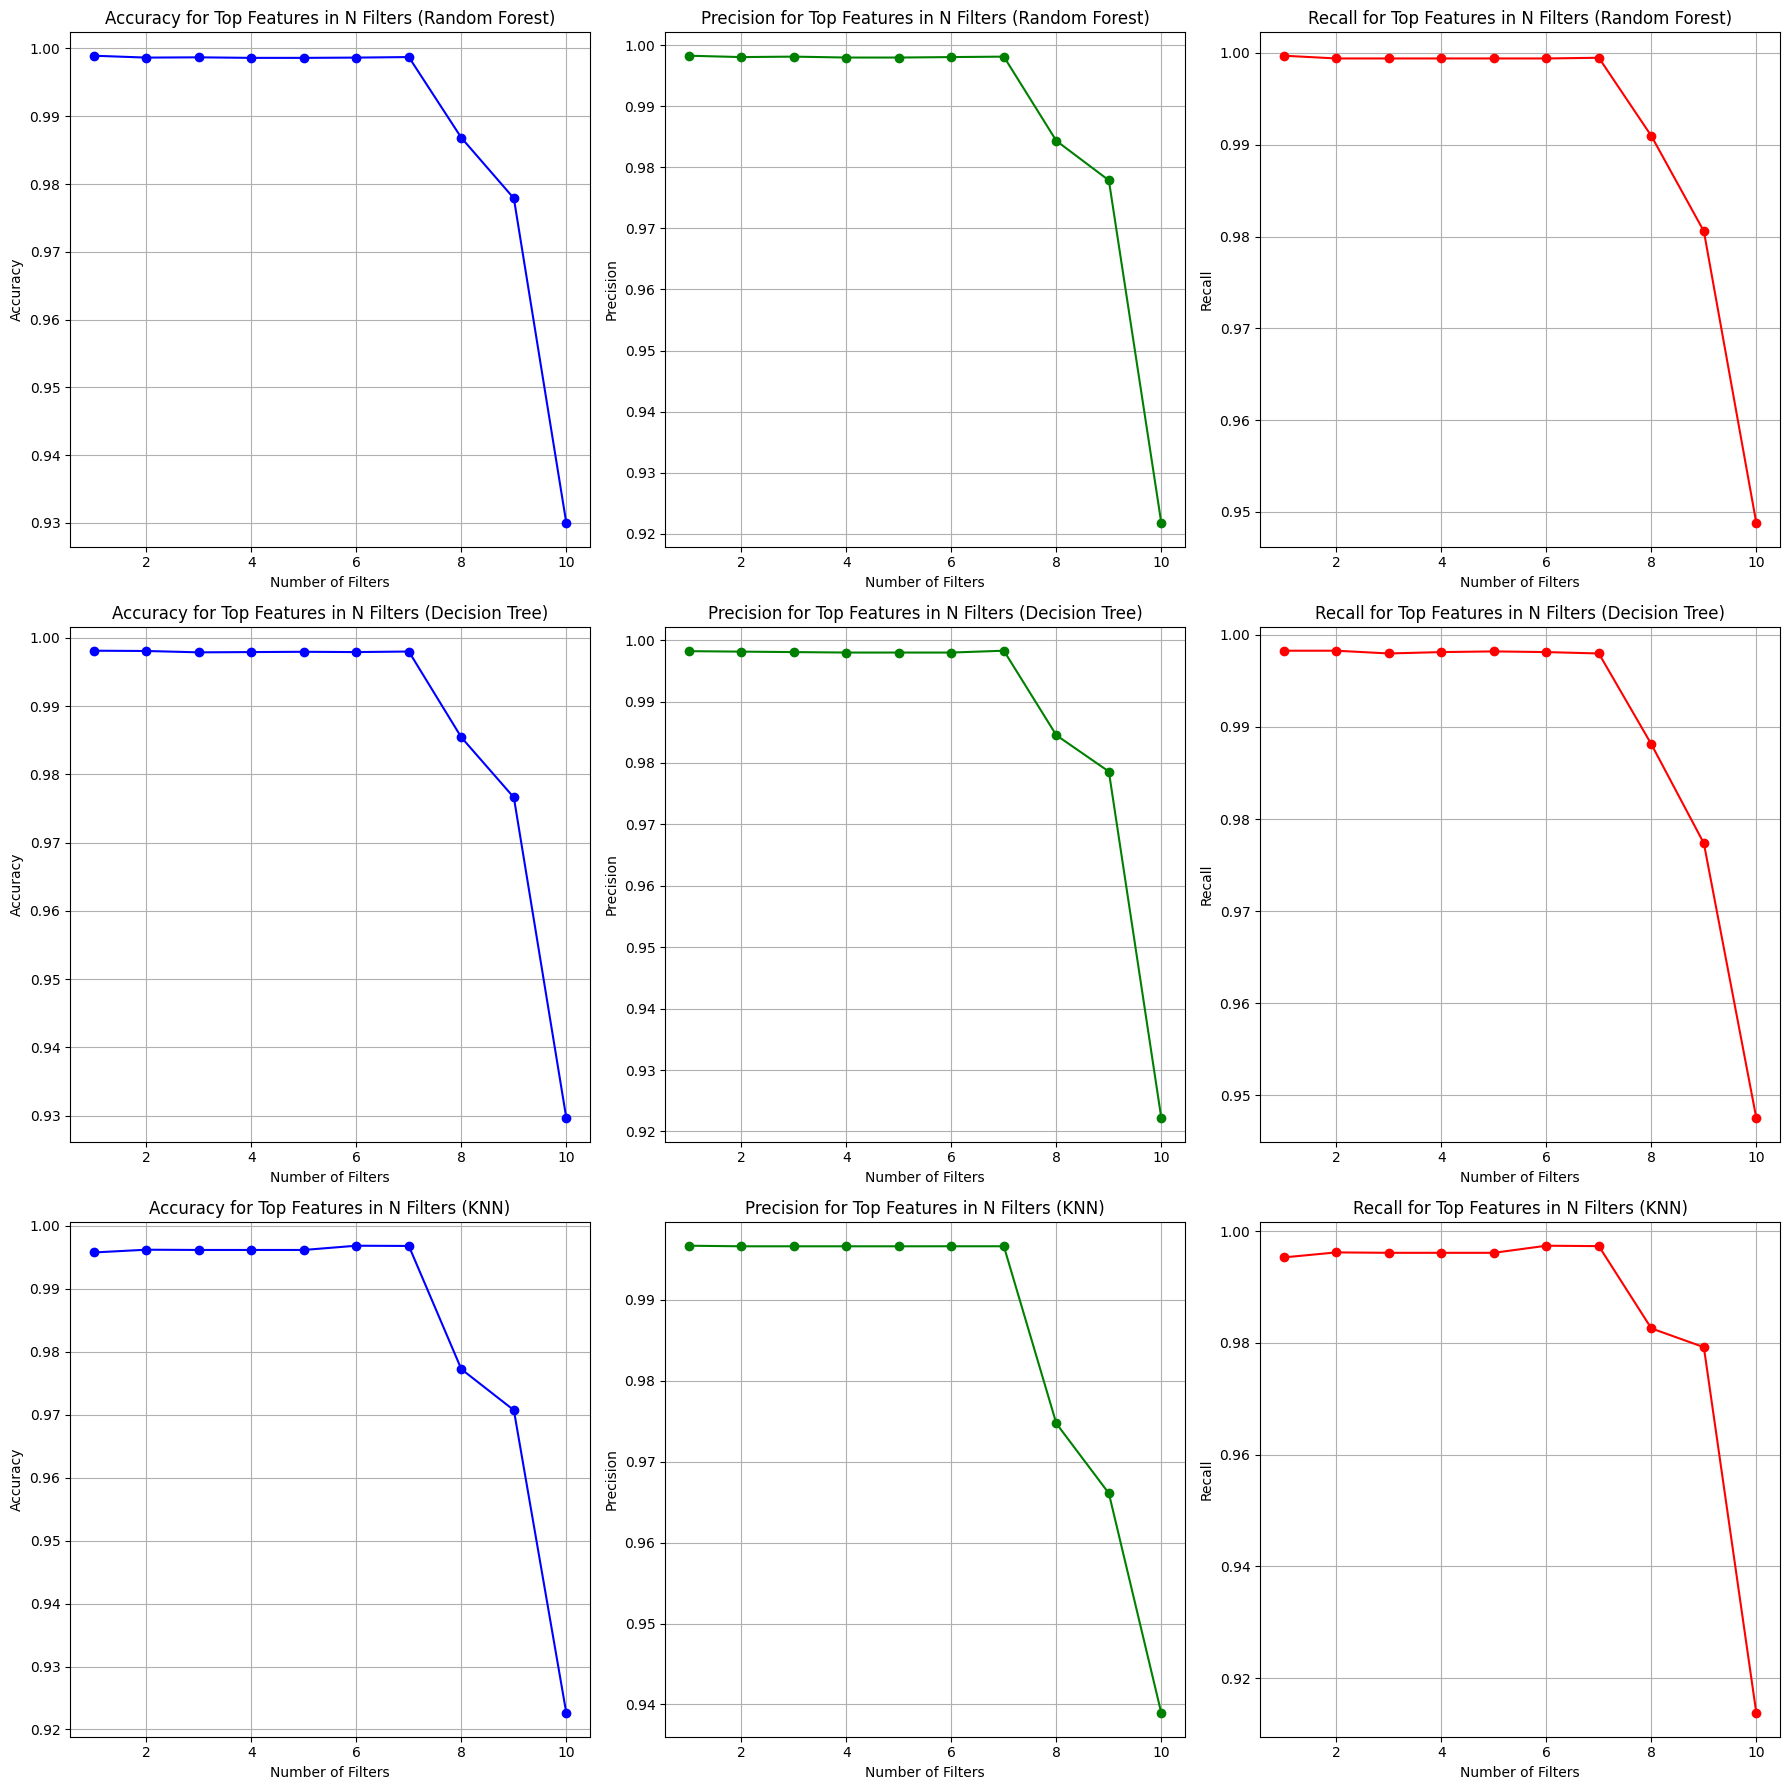


Random Forest:
-------------
Number of Filters: 1, Accuracy: 0.9988, Precision: 0.9982, Recall: 0.9996
Number of Filters: 2, Accuracy: 0.9988, Precision: 0.9981, Recall: 0.9996
Number of Filters: 3, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9995
Number of Filters: 4, Accuracy: 0.9985, Precision: 0.9979, Recall: 0.9993
Number of Filters: 5, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994
Number of Filters: 6, Accuracy: 0.9987, Precision: 0.9980, Recall: 0.9995
Number of Filters: 7, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994
Number of Filters: 8, Accuracy: 0.9923, Precision: 0.9901, Recall: 0.9955
Number of Filters: 9, Accuracy: 0.9925, Precision: 0.9903, Recall: 0.9957
Number of Filters: 10, Accuracy: 0.9885, Precision: 0.9872, Recall: 0.9913
Number of Filters: 11, No features selected
Number of Filters: 12, No features selected
Number of Filters: 13, No features selected
Number of Filters: 14, No features selected
Number of Filters: 15, No features selected
Number of

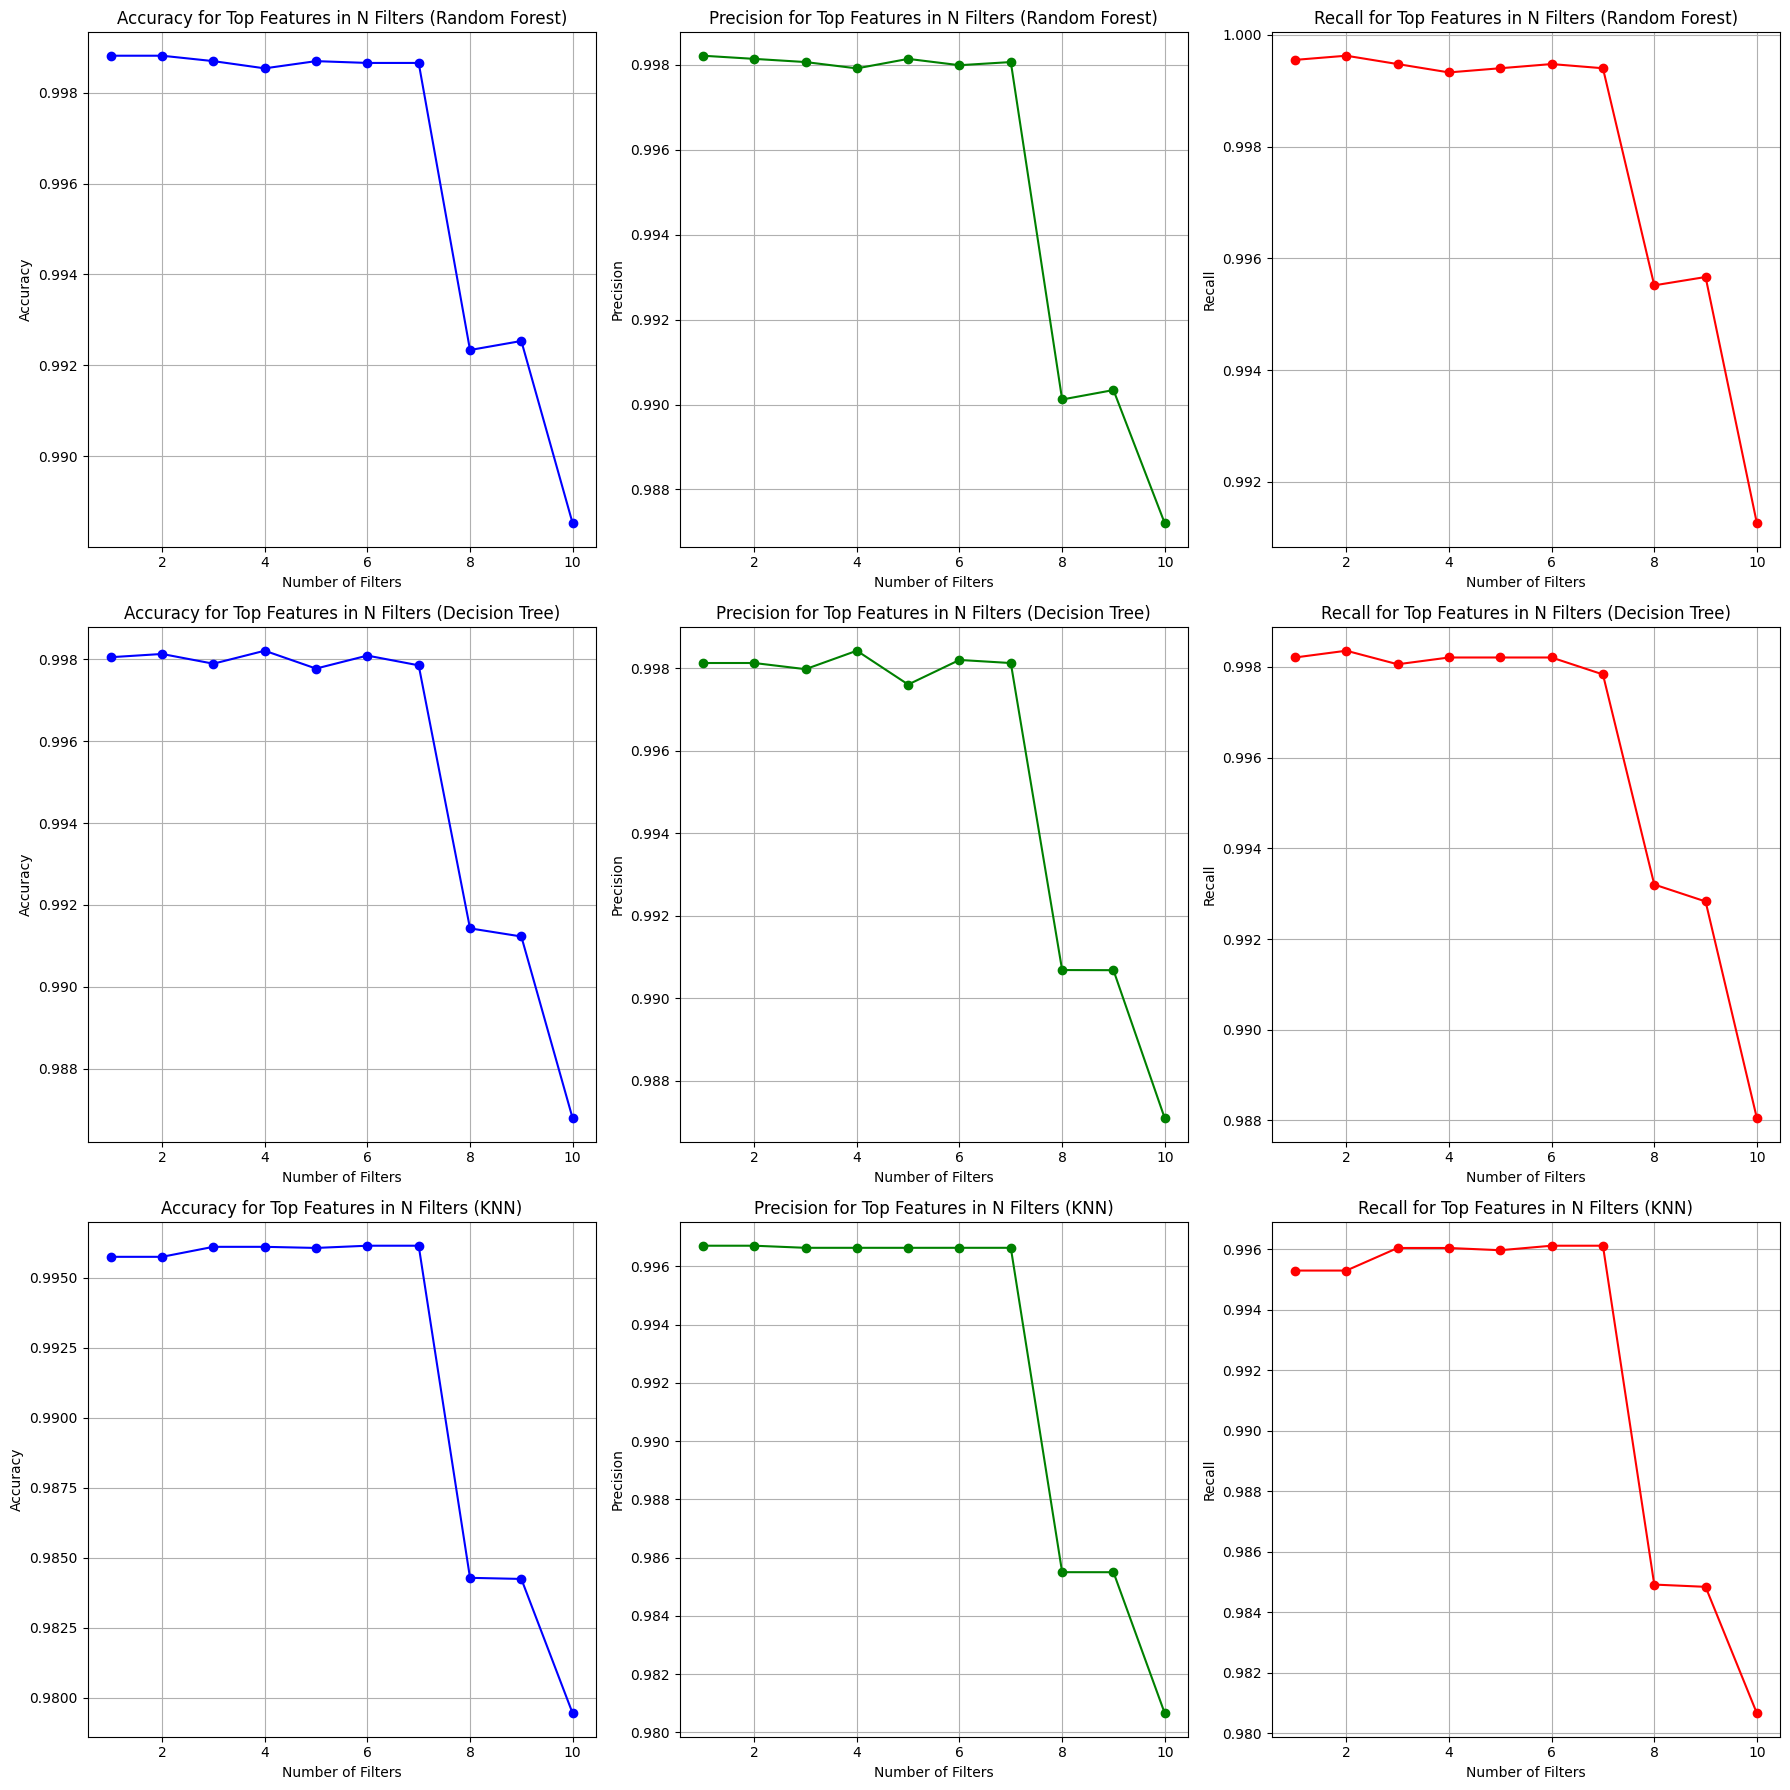

In [10]:
# # Extract top features from each filter method
# 
# n_values=[10,15,20]
# 
# for n_val in n_values:
#     
#     top_features_by_method = {}
#     for column in rankings_df.columns:
#         method_name = column  # Assuming column names are the filter method names
#         top_features_by_method[method_name] = set(rankings_df[column][:n_val])  # Assuming you want top 10 features
#     
#     # Flatten the list of features and count the occurrence of each feature
#     all_features = [feature for features in top_features_by_method.values() for feature in features]
#     feature_counts = Counter(all_features)
#     
#     # Find the features that are in at least 1, 2, ..., 10 filters
#     features_in_n_filters = {n: [feature for feature, count in feature_counts.items() if count >= n] for n in range(1, n_val+1)}
#     
#     # Convert the dictionary to a DataFrame
#     features_df = pd.DataFrame.from_dict(features_in_n_filters, orient='index')
#     
#     # Transpose the DataFrame so that each row corresponds to a number of filters
#     features_df = features_df.transpose()
#     
#     # Now, each column in features_df corresponds to a number of filters, and contains a list of features
#     # Initialize an empty DataFrame to store the results
#     results_df = pd.DataFrame()
#     
#     fig, axs = plt.subplots(len(classifiers), 3, figsize=(6*len(classifiers), 6*len(classifiers)))
#     
#     colors = ['b', 'g', 'r']  # blue for accuracy, green for precision, red for recall
#     
#     for i, (classifier_name, classifier) in enumerate(classifiers.items()):
#         metrics_results = {'accuracy': {}, 'precision': {}, 'recall': {}}
#         print(f'\n{classifier_name}:\n{"-" * len(classifier_name)}')
#     
#         for n, features in features_in_n_filters.items():
#             # Check if the list of features is empty
#             if not features:
#                 print(f'Number of Filters: {n}, No features selected')
#                 continue
#     
#             X_train_selected = X_train[features]
#             X_test_selected = X_test[features]
#     
#             classifier.fit(X_train_selected, y_train)
#             y_pred = classifier.predict(X_test_selected)
#     
#             metrics_results['accuracy'][n] = accuracy_score(y_test, y_pred)
#             metrics_results['precision'][n] = precision_score(y_test, y_pred)
#             metrics_results['recall'][n] = recall_score(y_test, y_pred,)
#     
#             print(f'Number of Filters: {n}, Accuracy: {metrics_results["accuracy"][n]:.4f}, Precision: {metrics_results["precision"][n]:.4f}, Recall: {metrics_results["recall"][n]:.4f}')
#     
#         # Convert the metrics results to a DataFrame and append to the results DataFrame
#         temp_df = pd.DataFrame(metrics_results)
#         results_df = pd.concat([results_df, temp_df])
#     
#         for j, metric in enumerate(['accuracy', 'precision', 'recall']):
#             axs[i, j].plot(list(metrics_results[metric].keys()), list(metrics_results[metric].values()), marker='o', color=colors[j])
#             axs[i, j].set_xlabel('Number of Filters')
#             axs[i, j].set_ylabel(metric.capitalize())
#             axs[i, j].set_title(f'{metric.capitalize()} for Top Features in N Filters ({classifier_name})')
#             axs[i, j].grid(True)
#     
#     plt.tight_layout()
#     plt.show()


Random Forest:
-------------
Number of Filters: 1, Accuracy: 0.9988, Precision: 0.9982, Recall: 0.9996, FPR: 0.0020, F-score: 0.9989
Number of Filters: 2, Accuracy: 0.9987, Precision: 0.9982, Recall: 0.9993, FPR: 0.0020, F-score: 0.9988
Number of Filters: 3, Accuracy: 0.9986, Precision: 0.9981, Recall: 0.9993, FPR: 0.0022, F-score: 0.9987
Number of Filters: 4, Accuracy: 0.9987, Precision: 0.9982, Recall: 0.9993, FPR: 0.0020, F-score: 0.9987
Number of Filters: 5, Accuracy: 0.9985, Precision: 0.9981, Recall: 0.9991, FPR: 0.0022, F-score: 0.9986
Number of Filters: 6, Accuracy: 0.9986, Precision: 0.9982, Recall: 0.9991, FPR: 0.0020, F-score: 0.9987
Number of Filters: 7, Accuracy: 0.9982, Precision: 0.9979, Recall: 0.9987, FPR: 0.0024, F-score: 0.9983
Number of Filters: 8, Accuracy: 0.9228, Precision: 0.9068, Recall: 0.9526, FPR: 0.1110, F-score: 0.9291
Number of Filters: 9, Accuracy: 0.8476, Precision: 0.8773, Recall: 0.8291, FPR: 0.1315, F-score: 0.8525
Number of Filters: 10, No features

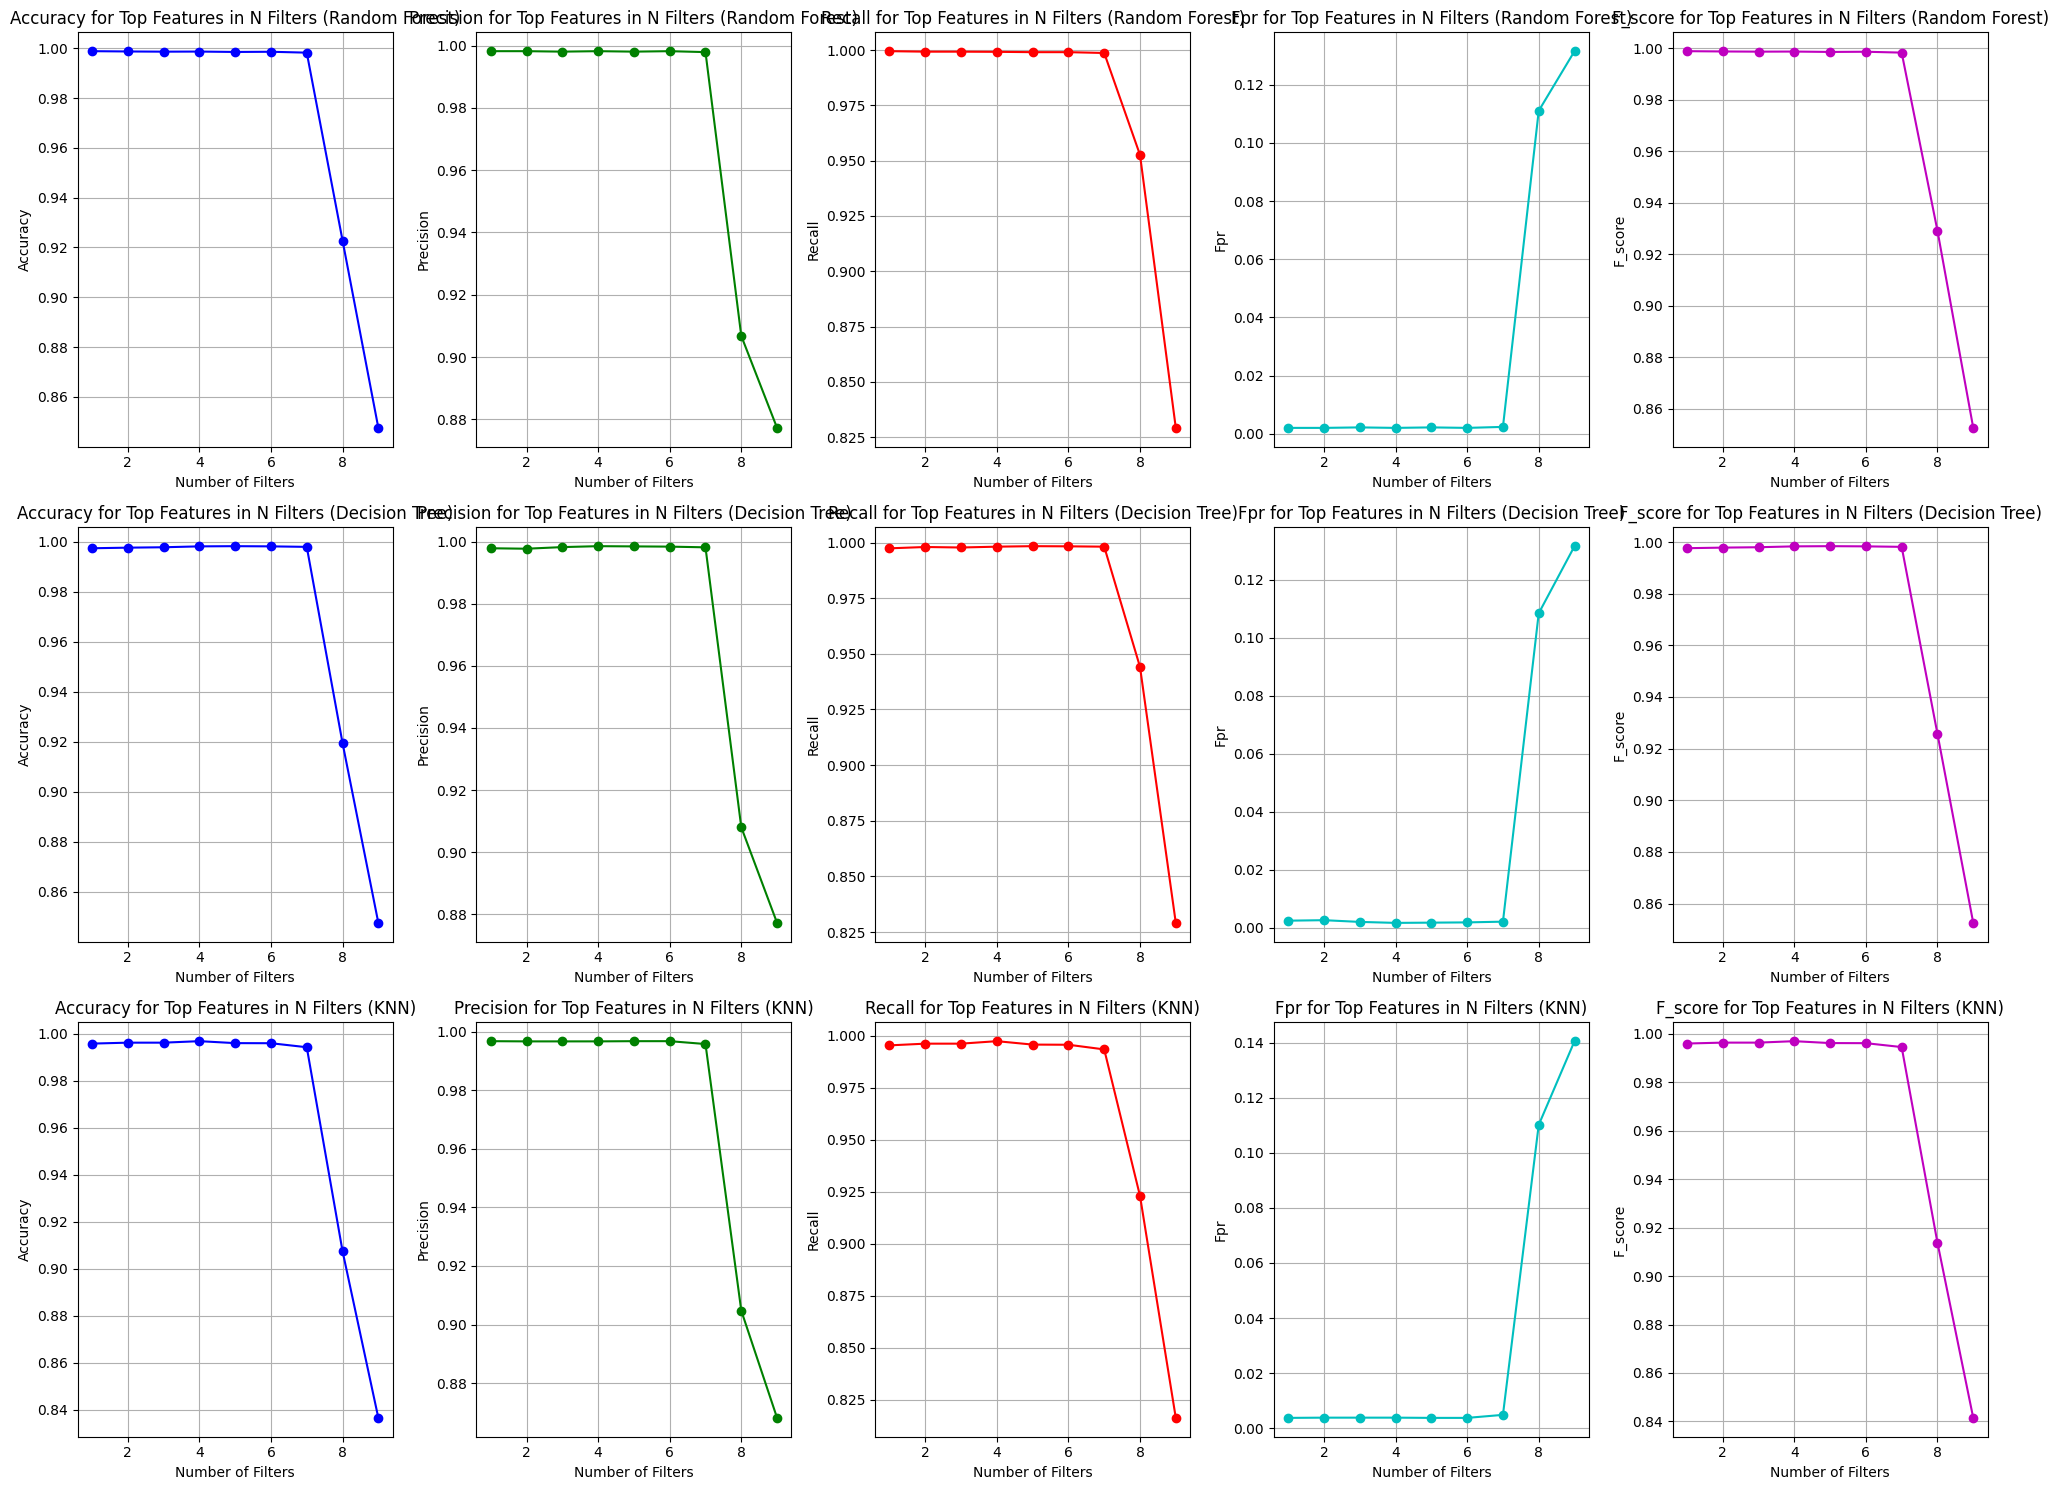


Random Forest:
-------------
Number of Filters: 1, Accuracy: 0.9988, Precision: 0.9981, Recall: 0.9996, FPR: 0.0021, F-score: 0.9989
Number of Filters: 2, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994, FPR: 0.0022, F-score: 0.9987
Number of Filters: 3, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994, FPR: 0.0022, F-score: 0.9987
Number of Filters: 4, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994, FPR: 0.0021, F-score: 0.9988
Number of Filters: 5, Accuracy: 0.9987, Precision: 0.9980, Recall: 0.9995, FPR: 0.0023, F-score: 0.9987
Number of Filters: 6, Accuracy: 0.9986, Precision: 0.9979, Recall: 0.9994, FPR: 0.0024, F-score: 0.9987
Number of Filters: 7, Accuracy: 0.9987, Precision: 0.9983, Recall: 0.9993, FPR: 0.0019, F-score: 0.9988
Number of Filters: 8, Accuracy: 0.9870, Precision: 0.9843, Recall: 0.9913, FPR: 0.0180, F-score: 0.9878
Number of Filters: 9, Accuracy: 0.9779, Precision: 0.9775, Recall: 0.9809, FPR: 0.0256, F-score: 0.9792
Number of Filters: 10, Accuracy: 0

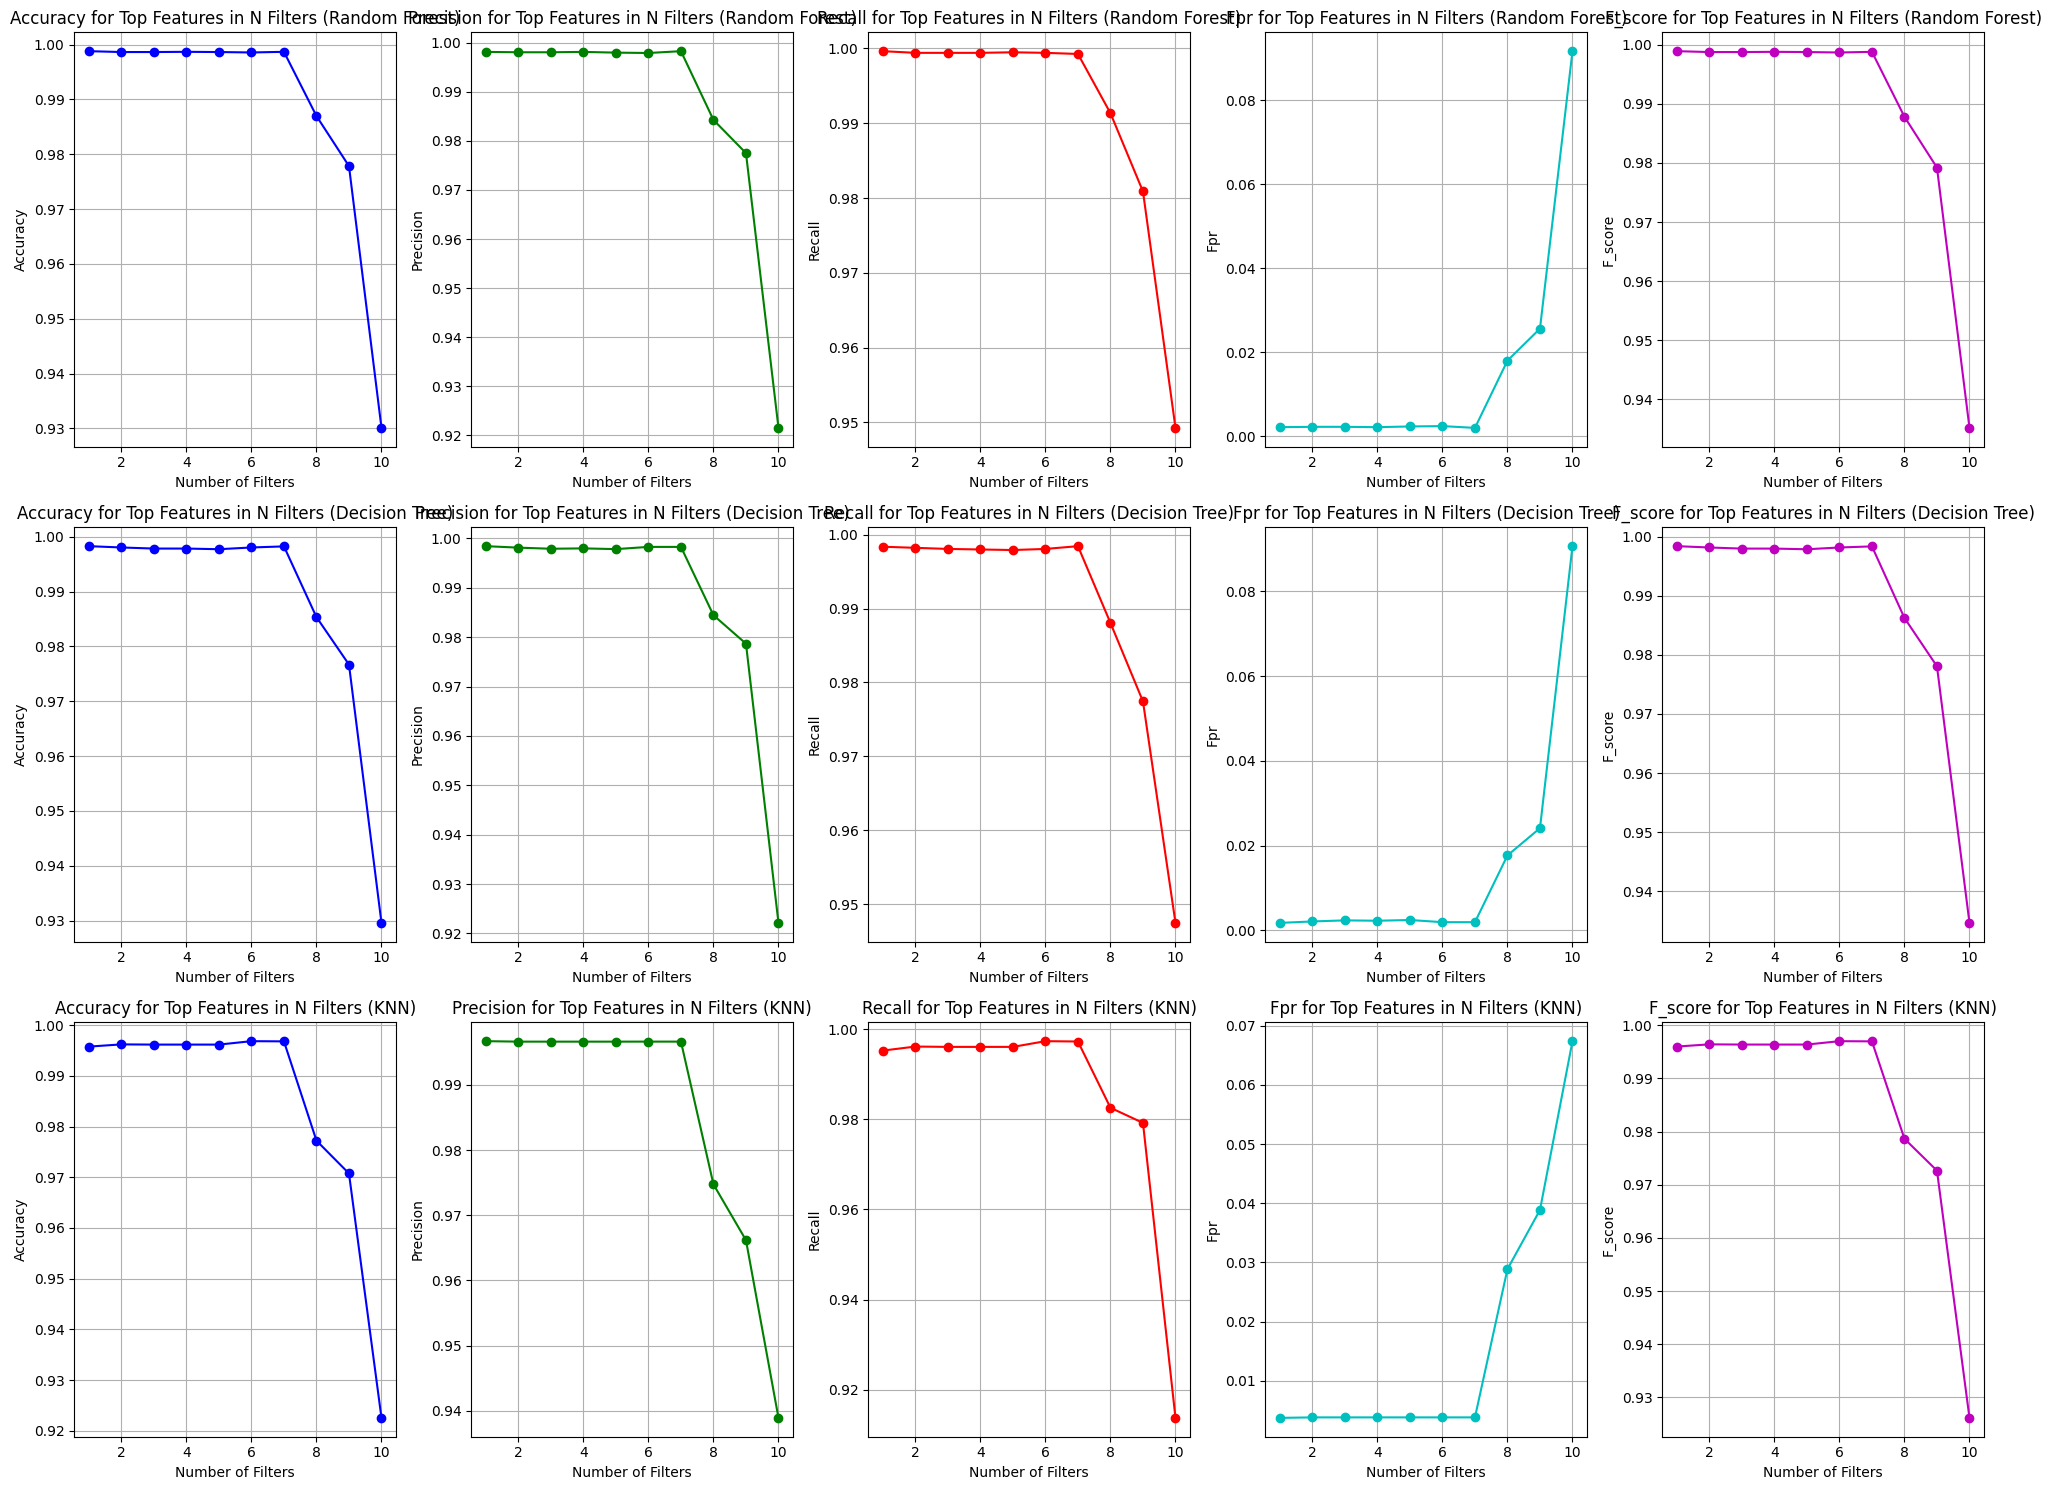


Random Forest:
-------------
Number of Filters: 1, Accuracy: 0.9990, Precision: 0.9984, Recall: 0.9998, FPR: 0.0019, F-score: 0.9991
Number of Filters: 2, Accuracy: 0.9988, Precision: 0.9982, Recall: 0.9996, FPR: 0.0020, F-score: 0.9989
Number of Filters: 3, Accuracy: 0.9988, Precision: 0.9981, Recall: 0.9996, FPR: 0.0021, F-score: 0.9989
Number of Filters: 4, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994, FPR: 0.0022, F-score: 0.9987
Number of Filters: 5, Accuracy: 0.9986, Precision: 0.9980, Recall: 0.9994, FPR: 0.0023, F-score: 0.9987
Number of Filters: 6, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994, FPR: 0.0021, F-score: 0.9988
Number of Filters: 7, Accuracy: 0.9987, Precision: 0.9981, Recall: 0.9994, FPR: 0.0021, F-score: 0.9988
Number of Filters: 8, Accuracy: 0.9925, Precision: 0.9903, Recall: 0.9955, FPR: 0.0110, F-score: 0.9929
Number of Filters: 9, Accuracy: 0.9924, Precision: 0.9901, Recall: 0.9957, FPR: 0.0113, F-score: 0.9929
Number of Filters: 10, Accuracy: 0

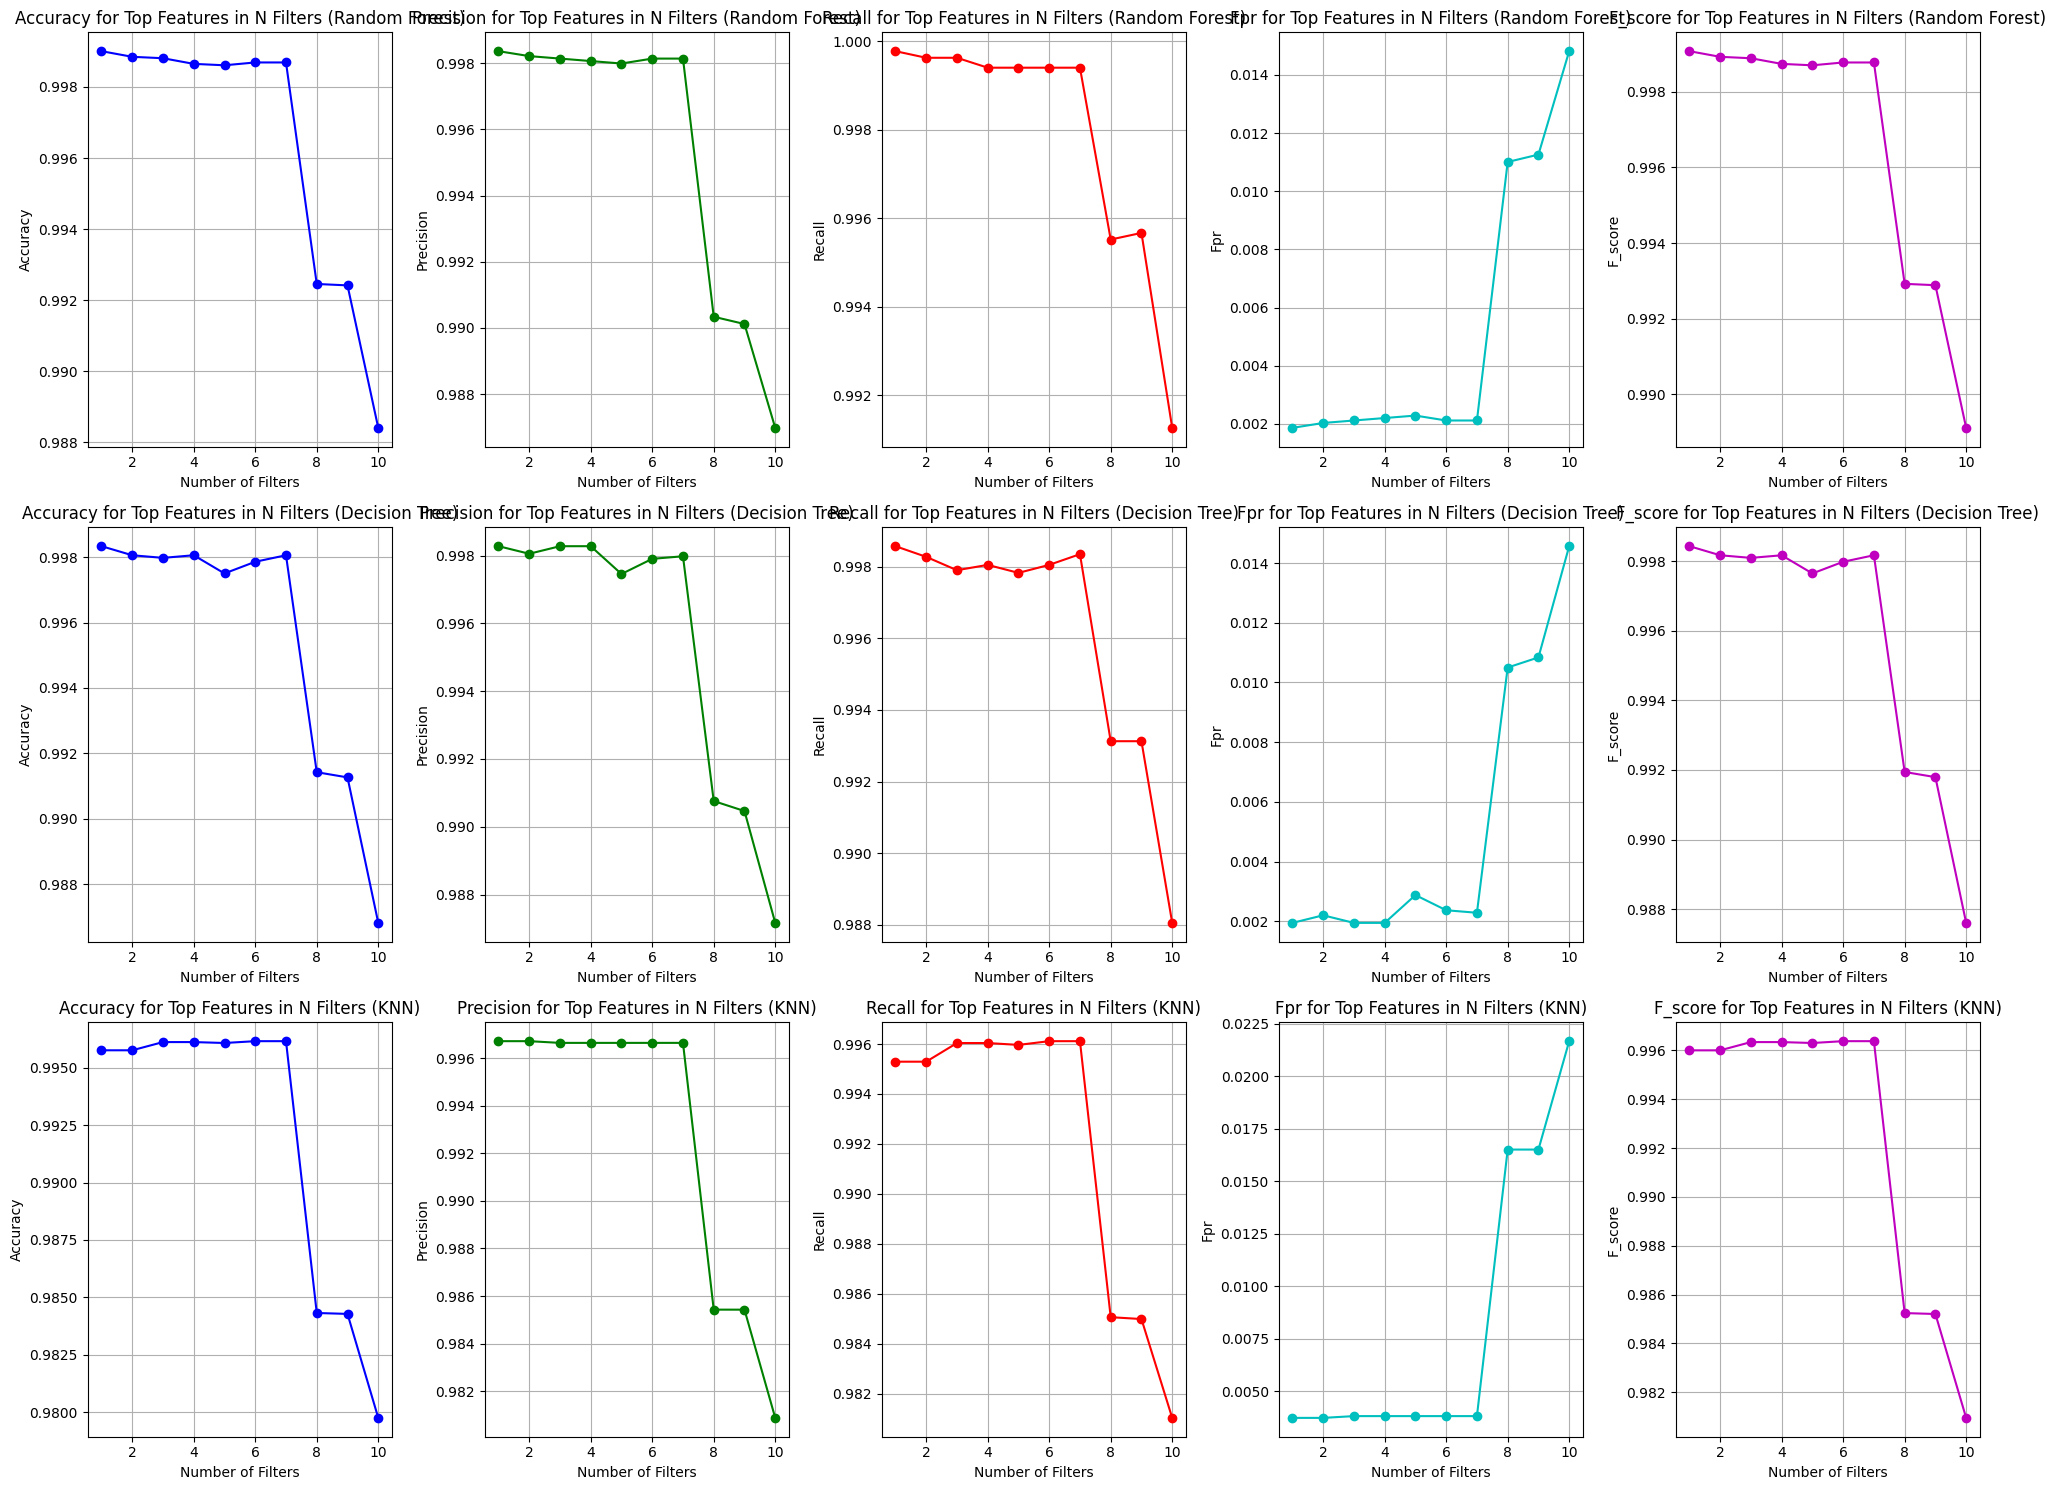

In [9]:
from sklearn.metrics import confusion_matrix, f1_score

# Extract top features from each filter method
n_values = [10, 15, 20]

for n_val in n_values:
    
    top_features_by_method = {}
    for column in rankings_df.columns:
        method_name = column  # Assuming column names are the filter method names
        top_features_by_method[method_name] = set(rankings_df[column][:n_val])  # Assuming you want top n_val features
    
    # Flatten the list of features and count the occurrence of each feature
    all_features = [feature for features in top_features_by_method.values() for feature in features]
    feature_counts = Counter(all_features)
    
    # Find the features that are in at least 1, 2, ..., n_val filters
    features_in_n_filters = {n: [feature for feature, count in feature_counts.items() if count >= n] for n in range(1, n_val+1)}
    
    # Convert the dictionary to a DataFrame
    features_df = pd.DataFrame.from_dict(features_in_n_filters, orient='index')
    
    # Transpose the DataFrame so that each row corresponds to a number of filters
    features_df = features_df.transpose()
    
    # Initialize an empty DataFrame to store the results
    results_df = pd.DataFrame()
    
    fig, axs = plt.subplots(len(classifiers), 5, figsize=(20, 5*len(classifiers)))
    
    colors = ['b', 'g', 'r', 'c', 'm']  # blue for accuracy, green for precision, red for recall, cyan for FPR, magenta for F-score
    
    for i, (classifier_name, classifier) in enumerate(classifiers.items()):
        metrics_results = {'accuracy': {}, 'precision': {}, 'recall': {}, 'fpr': {}, 'f_score': {}}
        print(f'\n{classifier_name}:\n{"-" * len(classifier_name)}')
    
        for n, features in features_in_n_filters.items():
            # Check if the list of features is empty
            if not features:
                print(f'Number of Filters: {n}, No features selected')
                continue
    
            X_train_selected = X_train[features]
            X_test_selected = X_test[features]
    
            classifier.fit(X_train_selected, y_train)
            y_pred = classifier.predict(X_test_selected)
    
            metrics_results['accuracy'][n] = accuracy_score(y_test, y_pred)
            metrics_results['precision'][n] = precision_score(y_test, y_pred)
            metrics_results['recall'][n] = recall_score(y_test, y_pred)
            metrics_results['f_score'][n] = f1_score(y_test, y_pred)
            
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            metrics_results['fpr'][n] = fp / (fp + tn)
    
            print(f'Number of Filters: {n}, Accuracy: {metrics_results["accuracy"][n]:.4f}, Precision: {metrics_results["precision"][n]:.4f}, Recall: {metrics_results["recall"][n]:.4f}, FPR: {metrics_results["fpr"][n]:.4f}, F-score: {metrics_results["f_score"][n]:.4f}')
    
        # Convert the metrics results to a DataFrame and append to the results DataFrame
        temp_df = pd.DataFrame(metrics_results)
        results_df = pd.concat([results_df, temp_df])
    
        for j, metric in enumerate(['accuracy', 'precision', 'recall', 'fpr', 'f_score']):
            axs[i, j].plot(list(metrics_results[metric].keys()), list(metrics_results[metric].values()), marker='o', color=colors[j])
            axs[i, j].set_xlabel('Number of Filters')
            axs[i, j].set_ylabel(metric.capitalize())
            axs[i, j].set_title(f'{metric.capitalize()} for Top Features in N Filters ({classifier_name})')
            axs[i, j].grid(True)
    
    plt.tight_layout()
    plt.show()
